# Colours and symbolics
- Colours, symbols, and flags are powerful elements in dashboards and reports for guiding the user's attention and conveying messages.
- These elements are relevant both inside plots and throughout the dashboards as a whole.

## Plots
### Groups
- Colours, linestyles and plot symbols are typically used to identify or emphasize groups or classes.
- Most plotting libraries have contrasting colour series specially made for categories.
- Scatterplots with group-wise symbols or symbol selection based on a DataFrame column.

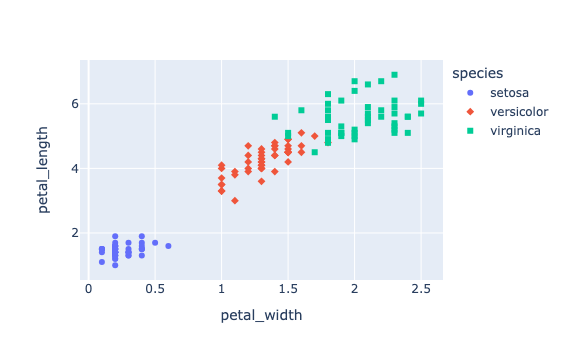

In [5]:
# Use plotly express to plot petal widths and lengths of the iris data set (imported from plotly). 
# Colour and symbol by species.
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="petal_width", y="petal_length", color="species", symbol="species")
fig.show()

### Focused element
- Clicking or hovering over an element can be used to invoke a change.
    - Colour or size change on the selected element.
    - "Defocus" on the remaining elements, e.g., by changing opacity or hue.

In [44]:
import plotly.graph_objects as go

df = px.data.iris()
x = df["sepal_width"]
y = df["sepal_length"]

# Main plot
f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])
f.update_layout(xaxis_title="Sepal width", yaxis_title="Sepal length")
# Set xlimits and ylimits
f.update_yaxes(range=[4, 8.1])
f.update_xaxes(range=[1.8, 4.5])

# Create a color list based on px.colors.qualitative.Vivid which has three colors.
colors = [px.colors.qualitative.Vivid[i] for i in df["species_id"]]
sizes = [10] * len(x)

# Attributes of the scatter object
scatter = f.data[0]
scatter.marker.color = colors
scatter.marker.size = [10] * len(x)
f.layout.hovermode = 'closest'

# Create our callback function
def update_point(trace, points, selector):
    species = df["species_id"][points.point_inds[0]]
    # Change all ellements in cols that have df.species != species gray
    # to '#bae2be'. Keep in mind that df.species is a series and that cols is a list.
    cols = ['#888888' if s != species else px.colors.qualitative.Vivid[s] for s in df.species_id]
    size = [12 if s == species else 10 for s in df.species_id]
    
    with f.batch_update():
        scatter.marker.color = cols
        scatter.marker.size = size

def reset_point(trace, points, selector):
    with f.batch_update():
        scatter.marker.color = colors
        scatter.marker.size = sizes

# Assign the callback function to the scatter object
scatter.on_hover(update_point)
scatter.on_unhover(reset_point)

f # Do not use .show() or the figure will not be interactive

FigureWidget({
    'data': [{'marker': {'color': [rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 177),
                                   rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 177),
                                   rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 177),
                                   rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 177),
                                   rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 177),
                                   rgb(93, 105, 177), rgb(93, 105, 177), rgb(93,
                                   105, 177), rgb(93, 105, 177), rgb(93, 105, 1

### Outliers/alerts
- The same basic techniques can be used as with focused elements, but the message should be stronger.
- Where a focused element may obtain a more intense colour or grow slightly, a proper contrast colour, typically bright red, is needed for outliers that warrant an alert.
- For outliers that are seen as part of the background noise, the symbolics should not be as strong.

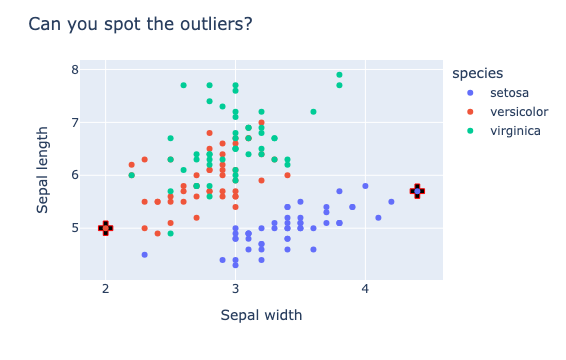

In [68]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
# Add a red cross behind the samples with lowest and highets sepal width
df_extreme = df[(df.sepal_width == df.sepal_width.min()) | (df.sepal_width == df.sepal_width.max())]
fig.add_trace(go.Scatter(x=df_extreme.sepal_width, y=df_extreme.sepal_length, mode="markers", marker=dict(color="black", size=12, symbol="cross"), showlegend=False))
fig.add_trace(go.Scatter(x=df_extreme.sepal_width, y=df_extreme.sepal_length, mode="markers", marker=dict(color="red", size=12, symbol="cross-open"), showlegend=False))
# Traces are plotted in the order they are added. To plot the crosses behind the original data, we need to change the order of the traces.
fig.data = (fig.data[3], fig.data[4], fig.data[0], fig.data[1], fig.data[2])
# Add title and axis labels
fig.update_layout(title="Can you spot the outliers?", xaxis_title="Sepal width", yaxis_title="Sepal length")
fig.show()

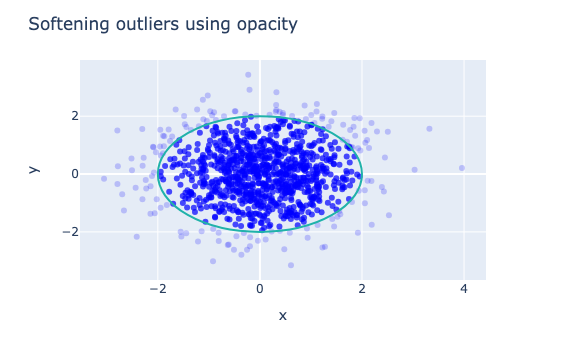

In [88]:
# Plot a random sample of 1000 normal distributed points as a 2D scatter plot.
import numpy as np
np.random.seed(1)
N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)
dist_origin = np.sqrt(random_x ** 2 + random_y ** 2)

# Let the colour be blue and the opacity 0.7 for points closer than 2 from the origin. Use opacity = 0.2 for all other points.
fig = px.scatter(x=random_x[dist_origin > 2], y=random_y[dist_origin > 2], opacity=0.2, color_discrete_sequence=['blue'])
fig.add_trace(go.Scatter(x=random_x[dist_origin <= 2], y=random_y[dist_origin <= 2], mode="markers", marker=dict(color="blue", opacity=0.7), showlegend=False))
# Add a circle with radius 2 around the origin
fig.add_shape(type="circle", xref="x", yref="y", x0=-2, y0=-2, x1=2, y1=2, line_color="LightSeaGreen")
fig.update_layout(title="Softening outliers using opacity")
fig.show()

## Colours blindness
- [Colour blindness](https://en.wikipedia.org/wiki/Color_blindness) affects up to 8% of men and 0.5% of women.
- Red-green is the most common problem, followed by blue-yellow, but there are many variants.
    - Each version comes with several confusions, e.g., red-green colourblindness may cause problems in distingushing:
        - cyan and grey,
        - rose-pink and grey,
        - blue and purple,
        - yellow and neon green,
        - red, green, orange, brown.
- Some sequential colourmaps are designed to be convey the differences regardless of vision type by superimposing a light-to-dark scale and yellow-to-blue scale, e.g., Cividis, Viridis, and Parula.
  
A simplified depiction of colour perception for various conditions (public domain figure from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Color_blindness.svg))
<img src="../../images/Color_blindness.png" width="460px">  
<img src="https://github.com/khliland/IND320/blob/main/D2Dbook/images/Color_blindness.png?raw=TRUE" width="460px">  

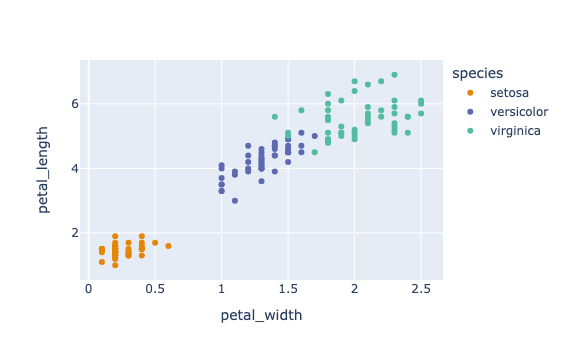

In [3]:
# Use plotly express to plot petal widths and lengths of the iris data set (imported from plotly). Colour by species. 
# Use a colour scale friendly to colour blind people.
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="petal_width", y="petal_length", color="species", color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

## Colour perception
- Colour perception is not linear with RGB values.
- Thus, resolving colours of different intensities is not equal for all colours.
- Some colour gradients are specially made to appear linear.
    - [matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) has a comprehensive overview of colour choices.

In [119]:
# Add ipywidgets slider to control the number of rectangles.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
def plot_rectangles(n):
    # Set figure size to 10 x 4
    _, ax = plt.subplots(figsize=(10, 4))
    for i in range(n):
        rectR = patches.Rectangle((i / n, 5), 1 / n, 1, facecolor=(i / (n-1), 0, 0))
        ax.add_patch(rectR)
        rectG = patches.Rectangle((i / n, 4), 1 / n, 1, facecolor=(0, i / (n-1), 0))
        ax.add_patch(rectG)
        rectB = patches.Rectangle((i / n, 3), 1 / n, 1, facecolor=(0, 0, i / (n-1)))
        ax.add_patch(rectB)
        rectY = patches.Rectangle((i / n, 2), 1 / n, 1, facecolor=(i / (n-1), i / (n-1), 0))
        ax.add_patch(rectY)
        rectC = patches.Rectangle((i / n, 1), 1 / n, 1, facecolor=(0, i / (n-1), i / (n-1)))
        ax.add_patch(rectC)
        rectM = patches.Rectangle((i / n, 0), 1 / n, 1, facecolor=(i / (n-1), 0, i / (n-1)))
        ax.add_patch(rectM)
    # Set y limits
    ax.set_ylim(0, 6)
    plt.show()
widgets.interact(plot_rectangles, n=widgets.IntSlider(min=20, max=100, step=1, value=20))

interactive(children=(IntSlider(value=20, description='n', min=20), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_rectangles(n)>

In [124]:
# There are many colourmaps in matplotlib.
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

## Dashboards and reports
### Colours
- Colours and symbols are also useful outside plots.
- Visual cues:
    - Grouping elements with separate background colour or border.
    - Making some plot stand out from the crowd by using a contrast around it.
    - Changing background, text colour, or text background colour based on user actions or events in the data.
- Colour themes can be complimentary to plots or crash harshly. Both are effects that are useful.
    - Streamsync's colour-picker is useful for syncing colours or finding different versions.
    - Changing between HEX (#000000), RGB (0,0,0), and HSL (0,0,0) can be used when exploring colours:
        - For instance, choose a colour using the colour picker (streamsync can pick anything visible on the screen), swithc to HSL and cycle through hues.
        - This results in limiting a colour search to colours with matching saturation (colour intensity from gray to pure) and lightness (from black to full colour/white).
- Colours for KPIs (key performance metrics) emphasises ranges, e.g., positive vs negative, within the normal vs extreme, etc.
- Colours for alterts is powerful, not only in symbols/signs, but also for backgrounds.

### Symbols
- Emojis, cliparts, animated GIFs and similar are effective in catching attention.
- Therefore they must be used sparingly.
    - A spinning company logo might be cool at first sight, but quickly becomes anoying.
    - Static, graphical elements that blend in to the theme may be used as long as they have a function, e.g., conveying identity, showing a state, or making it easy to detect which app/environment is active.
- Symbols used as alerts must be immediately visible using sharp contrasts.
    - In streamsync, an alert sign can be loaded on startup, but set to invisible or it can be a plot that changes.

## Exercise
- Test the use of colors and conditional symbols/flags in streamsync.

```{seealso} Resources
:class: tip
- [Colour blindness](https://en.wikipedia.org/wiki/Color_blindness)
- [matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
```